>>**RANDOM FOREST MACHINE LEARNING**

**LOAN DATASET**

About:publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

**Import the library files**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
**LOAD HE DATASET

In [2]:
Loan=pd.read_csv('loan_data.csv')

In [5]:
Loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
Loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
Loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


>>Exploratory data Analysis

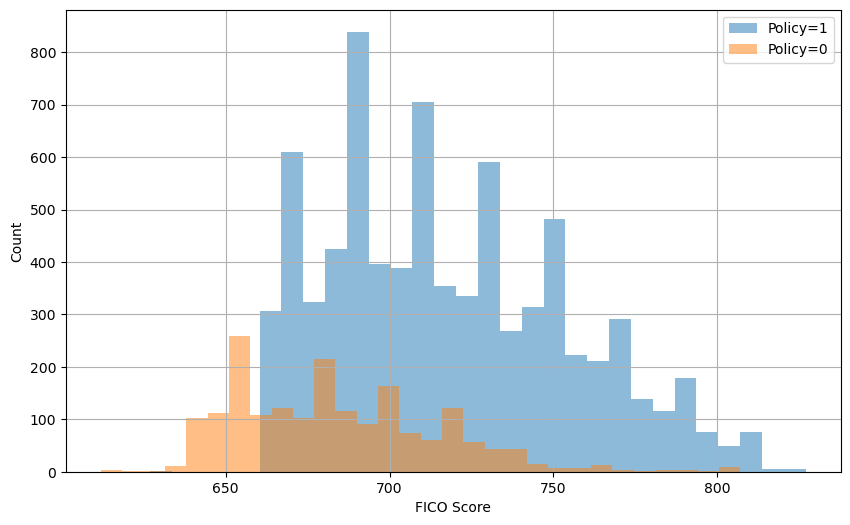

In [22]:

plt.figure(figsize=(10,6))
Loan[Loan['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30,label='Policy=1')
Loan[Loan['credit.policy']==0]['fico'].hist(alpha=0.5,bins=30,label='Policy=0')
plt.legend()
plt.xlabel("FICO Score")
plt.ylabel("Count")


plt.show()

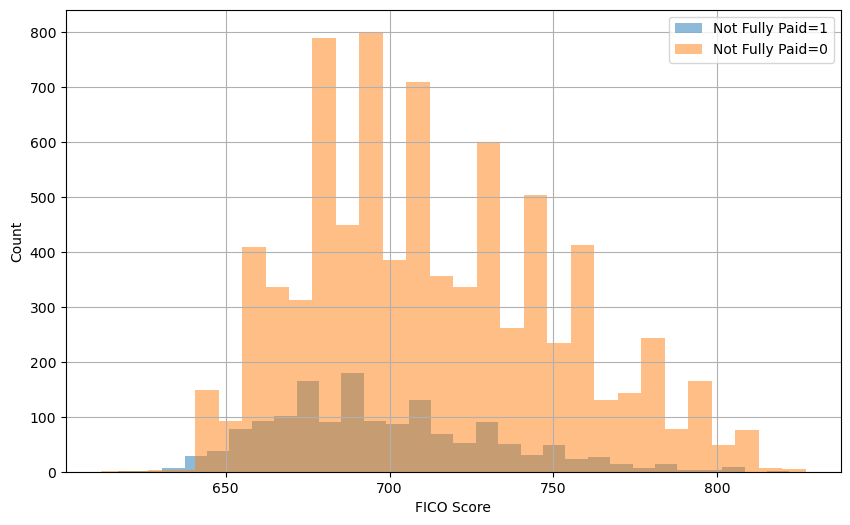

In [27]:
plt.figure(figsize=(10,6))
Loan[Loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=30,label='Not Fully Paid=1')
Loan[Loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=30,label='Not Fully Paid=0')
plt.legend()
plt.xlabel("FICO Score")
plt.ylabel("Count")
plt.show()

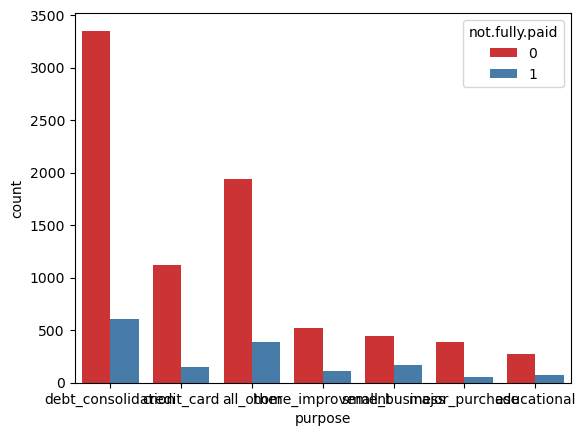

In [34]:
sns.countplot(x='purpose',hue='not.fully.paid',data=Loan,palette='Set1')
plt.show()

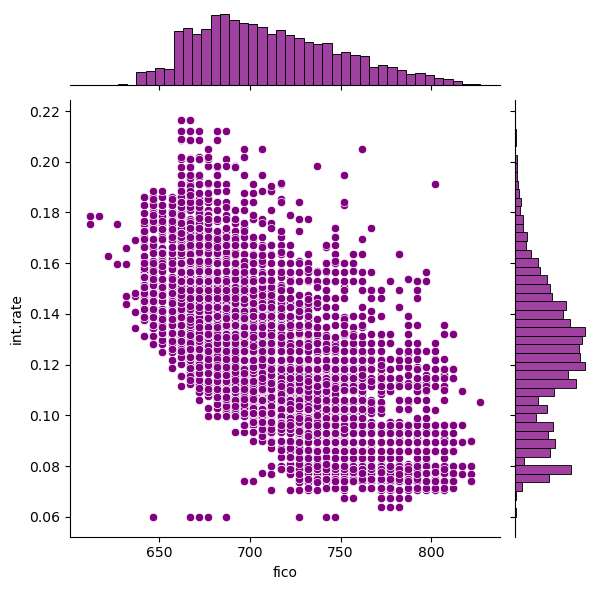

In [42]:
sns.jointplot(x='fico',y='int.rate',color='purple',data=Loan,kind='scatter')

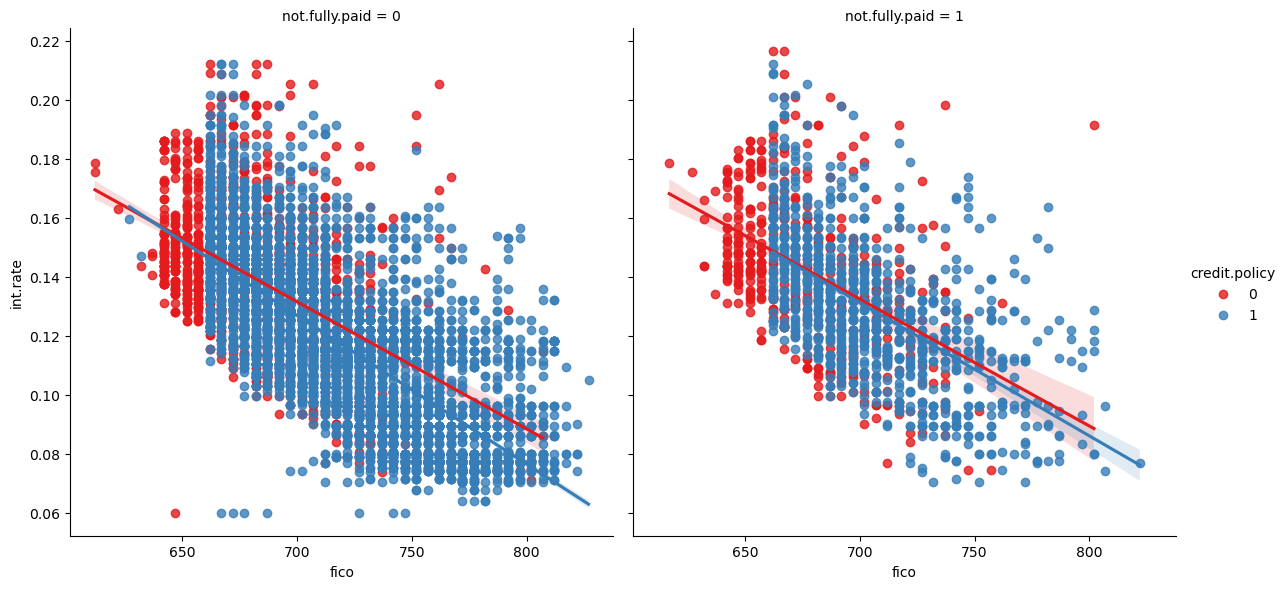

In [50]:
sns.lmplot(
    x="fico",
    y="int.rate",
    data=Loan,
    hue="credit.policy",     # color by credit policy
    col="not.fully.paid",    # separate into columns by not fully paid
    palette="Set1",          # red & blue like your screenshot
    height=6,
    aspect=1
)

plt.show()

>>SETTING UP THE DATA

In [51]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [52]:
pd.get_dummies

<function pandas.core.reshape.encoding.get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'>

In [53]:
cat_feats=['purpose']

In [61]:
Final_data=pd.get_dummies(Loan,columns=cat_feats,drop_first=True)
Final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [69]:
Final_data.to_csv('loan_data_final.csv', index=False)

In [70]:
Final_data.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


>>Train test Split

In [96]:
from sklearn.model_selection import train_test_split

In [119]:
X = Final_data.drop('not.fully.paid', axis=1)
y = Final_data['not.fully.paid']


In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

>>TRAINING A DECISION TREE MODEL

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
dtree=DecisionTreeClassifier(random_state=101)

In [123]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

>>PREDICTION AND EVALUATION of DECISION TREE

In [124]:
predictions=dtree.predict(X_test)

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.72      0.74      2874



In [127]:
print(confusion_matrix(y_test,predictions))

[[1975  456]
 [ 336  107]]


>>TRAINING THE RANDOM FOREST MODEL

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rfc=RandomForestClassifier(random_state=101)

In [132]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [138]:
rfc_predictions=rfc.predict(X_test)

In [139]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [140]:
print(confusion_matrix(y_test,rfc_predictions))

[[2422    9]
 [ 433   10]]


>>Conclusion

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Calculate metrics for Decision Tree
dtree_metrics = {
    "Accuracy": accuracy_score(y_test, predictions),
    "Precision": precision_score(y_test, predictions),
    "Recall": recall_score(y_test, predictions),
    "F1 Score": f1_score(y_test, predictions)
}

# Calculate metrics for Random Forest
rfc_metrics = {
    "Accuracy": accuracy_score(y_test, rfc_predictions),
    "Precision": precision_score(y_test, rfc_predictions),
    "Recall": recall_score(y_test, rfc_predictions),
    "F1 Score": f1_score(y_test, rfc_predictions)
}

# Combine into DataFrame
comparison = pd.DataFrame([dtree_metrics, rfc_metrics],
                          index=["Decision Tree", "Random Forest"])

# Display results
comparison


,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.724426,0.190053,0.241535,0.212724
Random Forest,0.846207,0.526316,0.022573,0.043290
